
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle

Cite this work: Fernández-Godino, M. G. (2023). Review of multi-fidelity models. arXiv preprint arXiv:1609.07196.


# Multi-Fidelity Modeling Toy Problem 4: Multi-Fidelity Analysis Using Co-Kriging

### Introduction

The `MultiFidelityAnalysis` class is an encapsulation for performing multi-fidelity analysis via Co-Kriging (CoKG). The class provides methods to fit a CoKG model, make predictions, and visualize the Low-Fidelity (LF) and High-Fidelity (HF) models alongside CoKG predictions.

### Requirements

- Python 3.6 or higher
- NumPy
- Matplotlib
- OpenMDAO

### Installation

```bash
pip install numpy matplotlib openmdao
```

### Class Methods and Attributes

#### `__init__(self, lb=0, ub=1)`

Initializes the `MultiFidelityAnalysis` object. 

**Parameters:**

- `lb`: Lower bound of the variable space (default is 0).
- `ub`: Upper bound of the variable space (default is 1).

#### `func_HF(x)`

High-Fidelity (HF) model as a function of `x`.

**Returns:**

- HF model response.

#### `func_LF(x)`

Low-Fidelity (LF) model as a function of `x`.

**Returns:**

- LF model response.

#### `fit_coKG(self, Xe, Xc)`

Fits the CoKG model with HF and LF data.

**Parameters:**

- `Xe`: Points where the HF model is evaluated.
- `Xc`: Points where the LF model is evaluated.

#### `predict_coKG()`

Predicts the CoKG model response over the generated points.

**Returns:**

- Tuple containing predicted response and standard deviation.

#### `plot_models(self, fHF, fLF, Xe, Xc, f_pred)`

Plots the LF, HF, and CoKG models with their sampling points.

**Parameters:**

- `fHF`, `fLF`: Responses from HF and LF models.
- `Xe`, `Xc`: Sampling points for HF and LF models.
- `f_pred`: CoKG predictions.

---

### Usage Example

```python
MFA = MultiFidelityAnalysis()
Xe = np.array([[0.2], [0.4], [0.85]])
Xc = np.vstack((np.array([[0.1], [0.25], [0.3], [0.5], [0.6], [0.7], [0.8], [0.9]]), Xe))
MFA.fit_coKG(Xe, Xc)
f_pred = MFA.predict_coKG()
MFA.plot_models(fHF, fLF, Xe, Xc, f_pred)
```

---

For further inquiries or contributions, feel free to reach out.

### Author

M. Giselle Fernández-Giselle, fernandez48@llnl.gov

### License

This project is licensed under the MIT License.

---

/var/folders/f7/xpt8t94x6xl8vsmqsbxt7ktm001t2c/T/ipykernel_49070/2473902380.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)


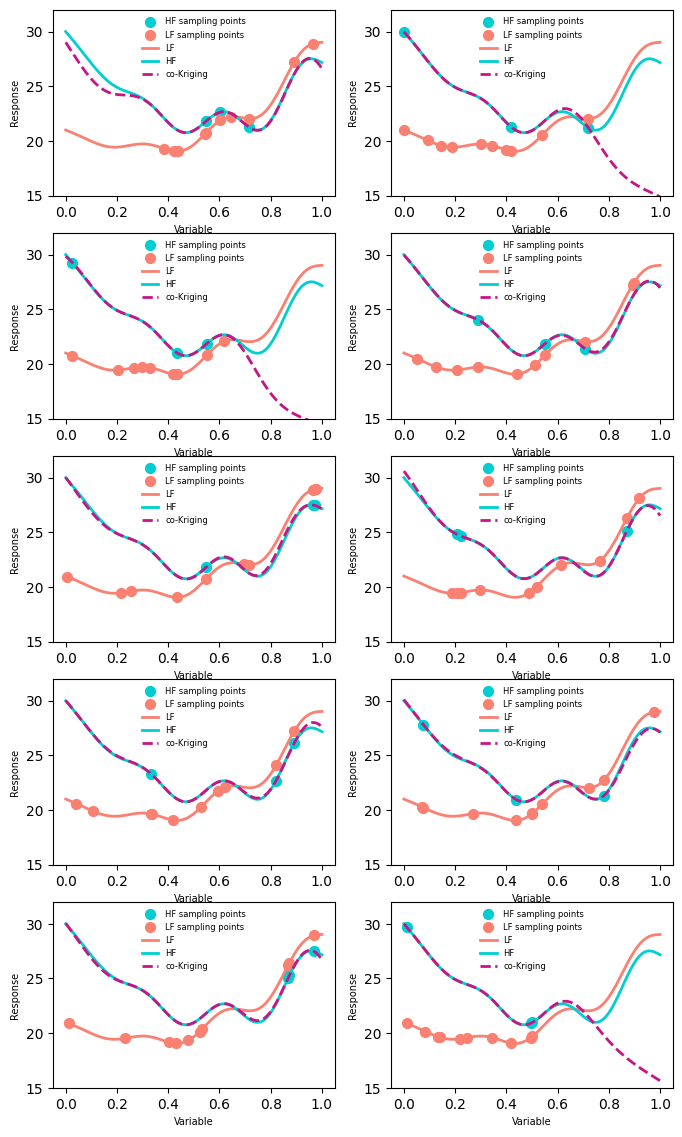

In [13]:

# Initialize Figure: Set up the plot figure with specific dimensions tailored for better visibility.
plt.figure(figsize=[8, 14])

# Low-Fidelity and High-Fidelity Initial Plots: Plot both models as a backdrop for subplots.
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Iterative Subplots: Create multiple subplots to showcase varying sampling points and predictions.
for i in range(10):
    # Subplot Configuration: Initialize the ith subplot in a 2x5 grid.
    plt.subplot(5, 2, i+1)
    
    # Random Seed: Ensure reproducibility of random numbers.
    np.random.seed(i)
    
    # Generate Sampling Points: Randomly generate High-Fidelity (Xe) and Low-Fidelity (Xc) sampling points.
    Xe = np.random.rand(3).reshape(-1, 1)
    Xc = np.vstack((np.random.rand(7).reshape(-1, 1), Xe))
    
    # Compute Responses: Evaluate the HF and LF functions at the sampling points.
    ye = func_HF(Xe)
    yc = func_LF(Xc)
    
    # Co-Kriging Model: Initialize and fit the co-Kriging model.
    ndmodel = coKG()
    ndmodel.fit([Xc, Xe], [yc, ye])
    
    # Prediction: Utilize the co-Kriging model to predict values over the defined variable range.
    f_pred = ndmodel.predict(x.reshape(-1, 1))

    # Plot Sampling Points: Represent HF and LF evaluation points as scatter plots.
    plt.scatter(Xe, ye, 50, c='darkturquoise', label='HF sampling points')
    plt.scatter(Xc, yc, 50, c='salmon', label='LF sampling points')
    
    # Overlay LF and HF Plots: Add lighter versions of initial LF and HF plots.
    plt.plot(x, fLF, c='salmon', linewidth=2, label='LF')
    plt.plot(x, fHF, c='darkturquoise', linewidth=2, label='HF')
    
    # Co-Kriging Prediction Plot: Superimpose the co-Kriging prediction on each subplot.
    plt.plot(x, f_pred[0], '--', c='mediumvioletred', linewidth=2, label='co-Kriging')
    
    # Legend and Axis Labels: Add a scaled-down legend and axis labels for each subplot.
    plt.legend(frameon=False, fontsize=6)
    plt.xlabel('Variable', fontsize=7)
    plt.ylabel('Response', fontsize=7)
    plt.ylim([15,32])

# Show Figure: Render the composite figure comprising all subplots.
#plt.show()

# Optional Save: Uncomment to save the figure as a high-resolution PNG file.
plt.savefig('Initial_sample_sensitivity.png', dpi=1000, bbox_inches='tight', transparent=True)


/var/folders/f7/xpt8t94x6xl8vsmqsbxt7ktm001t2c/T/ipykernel_49070/3421920465.py:89: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)


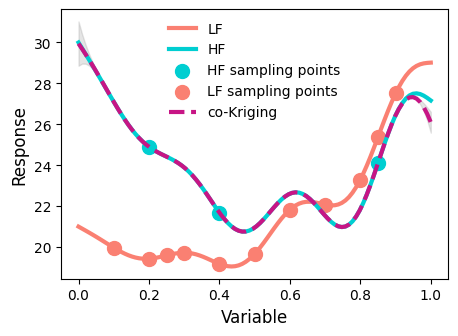

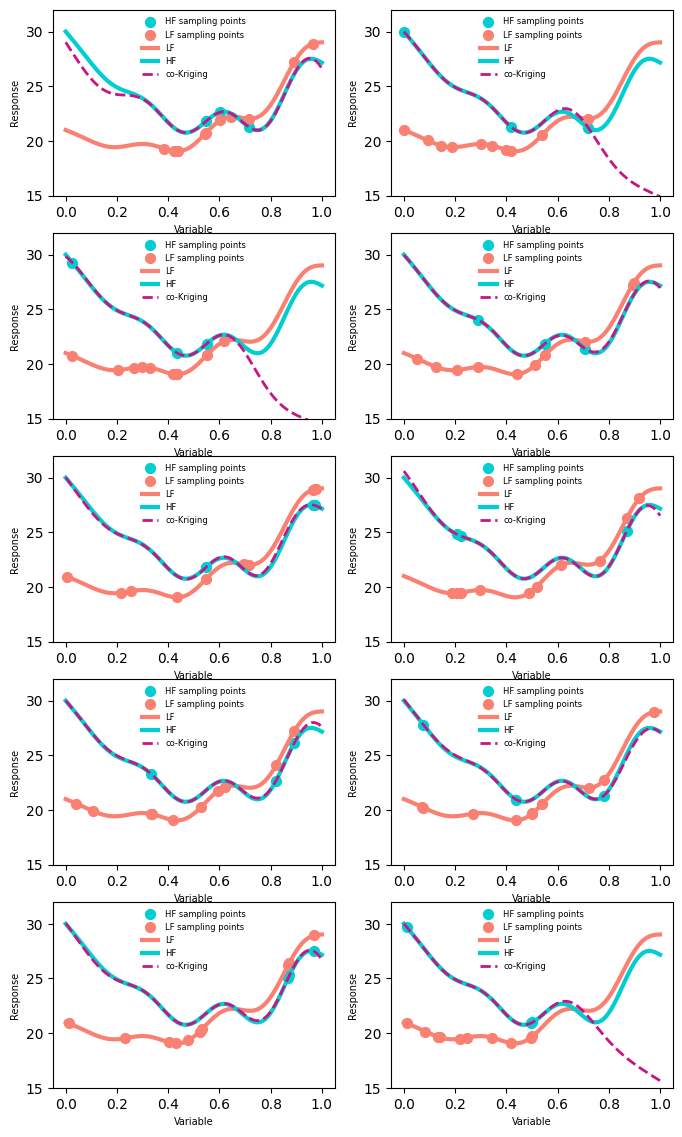

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from openmdao.surrogate_models.multifi_cokriging import MultiFiCoKriging as coKG

class CoKrigingAnalysis:
    """Class to encapsulate co-Kriging analysis for multi-fidelity models.

    The Co-Kriging method combines data from High-Fidelity (HF) and Low-Fidelity (LF)
    models to improve predictive accuracy over what could be achieved using each model
    separately. This class utilizes OpenMDAO's co-Kriging implementation.

    Attributes:
        lb (float): Lower boundary of the domain.
        ub (float): Upper boundary of the domain.
        x (numpy.ndarray): Linearly spaced vector for evaluation points within [lb, ub].
    """

    def __init__(self, lb=0, ub=1):
        """Initialize the boundaries and the evaluation points."""
        self.lb = lb
        self.ub = ub
        self.x = np.linspace(lb, ub, 100)

    @staticmethod
    def func_HF(x):
        """High-Fidelity model as a mathematical function.

        Args:
            x (numpy.ndarray): Input variable(s).

        Returns:
            numpy.ndarray: Model response.
        """
        return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1) ** 2

    @staticmethod
    def func_LF(x):
        """Low-Fidelity model as a mathematical function.

        Args:
            x (numpy.ndarray): Input variable(s).

        Returns:
            numpy.ndarray: Model response.
        """
        return 1.4 * x * np.sin(20 * x + 2) + 7 * np.exp(x) + 14 * (x - 1) ** 2 + 10 * x

    def fit_model(self, Xc, Xe, yc, ye):
        """Fit the co-Kriging model using HF and LF data points.

        Args:
            Xc, Xe (numpy.ndarray): Inputs for LF and HF models.
            yc, ye (numpy.ndarray): Responses from LF and HF models.

        Returns:
            coKG: Trained co-Kriging model.
        """
        ndmodel = coKG()
        ndmodel.fit([Xc, Xe], [yc, ye])
        return ndmodel

    def generate_basic_plot(self, fHF, fLF, f_pred, Xe, ye, Xc, yc):
        """Generate a basic plot illustrating the HF, LF, and co-Kriging models.

        Args:
            fHF, fLF, f_pred (numpy.ndarray): HF, LF, and predicted responses.
            Xe, ye (numpy.ndarray): HF evaluation points and their responses.
            Xc, yc (numpy.ndarray): LF evaluation points and their responses.
        """
        plt.figure(figsize=[5, 3.5])
        plt.plot(self.x, fLF, c='salmon', linewidth=3, label='LF')
        plt.plot(self.x, fHF, c='darkturquoise', linewidth=3, label='HF')
        plt.scatter(Xe, ye, 100, c='darkturquoise', label='HF sampling points')
        plt.scatter(Xc, yc, 100, c='salmon', label='LF sampling points')
        plt.plot(self.x, f_pred[0], '--', c='mediumvioletred', linewidth=3, label='co-Kriging')
        plt.fill_between(self.x, (f_pred[0] - f_pred[1]).reshape(len(self.x)), (f_pred[0] + f_pred[1]).reshape(len(self.x)), color='gray', alpha=0.2)
        plt.legend(frameon=False)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        plt.savefig('co-Kriging.png', dpi=1000, bbox_inches='tight', transparent=True)

    def sensitivity_analysis(self):
        """Conduct sensitivity analysis to assess the influence of initial sample size on the co-Kriging model."""
        plt.figure(figsize=[8, 14])
        plt.plot(self.x, self.func_LF(self.x), c='salmon', linewidth=3, label='LF')
        plt.plot(self.x, self.func_HF(self.x), c='darkturquoise', linewidth=3, label='HF')

        for i in range(10):
            plt.subplot(5, 2, i+1)
            np.random.seed(i)
            Xe = np.random.rand(3).reshape(-1, 1)
            Xc = np.vstack((np.random.rand(7).reshape(-1, 1), Xe))
            ye = self.func_HF(Xe)
            yc = self.func_LF(Xc)
            ndmodel = self.fit_model(Xc, Xe, yc, ye)
            f_pred = ndmodel.predict(self.x.reshape(-1, 1))
            plt.scatter(Xe, ye, 50, c='darkturquoise', label='HF sampling points')
            plt.scatter(Xc, yc, 50, c='salmon', label='LF sampling points')
            plt.plot(self.x, fLF, c='salmon', linewidth=3, label='LF')
            plt.plot(self.x, fHF, c='darkturquoise', linewidth=3, label='HF')
            plt.plot(self.x, f_pred[0], '--', c='mediumvioletred', linewidth=2, label='co-Kriging')
            plt.legend(frameon=False, fontsize=6)
            plt.xlabel('Variable', fontsize=7)
            plt.ylabel('Response', fontsize=7)
            plt.ylim([15,32])
        plt.savefig('Initial_sample_sensitivity.png', dpi=1000, bbox_inches='tight', transparent=True)

if __name__ == "__main__":
    analysis = CoKrigingAnalysis()

    fHF = analysis.func_HF(analysis.x)
    fLF = analysis.func_LF(analysis.x)

    Xe = np.array([[0.2], [0.4], [0.85]])
    Xc = np.vstack((np.array([[0.1], [0.25], [0.3], [0.5], [0.6], [0.7], [0.8], [0.9]]), Xe))
    ye = analysis.func_HF(Xe)
    yc = analysis.func_LF(Xc)

    ndmodel = analysis.fit_model(Xc, Xe, yc, ye)
    f_pred = ndmodel.predict(analysis.x.reshape(-1, 1))

    analysis.generate_basic_plot(fHF, fLF, f_pred, Xe, ye, Xc, yc)
    analysis.sensitivity_analysis()
